### 190234E - HEWASURA G.I.

Question 01 :

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

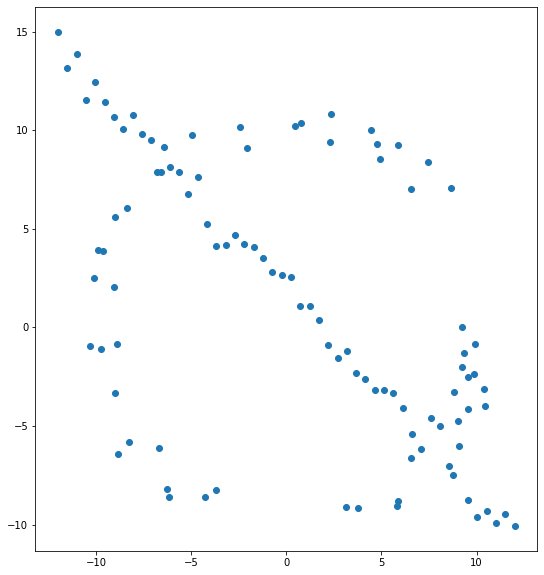

In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16

t = np.random.uniform(0 , 2*np . pi , half_n )
n = s*np.random.randn( half_n )
x , y = ( r + n) * np.cos( t ) , ( r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n,1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n ,1), y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

a,b = X[:,0],X[:,1]

#plotting the data set
plt.figure(figsize=(9, 10))
plt.plot(a,b, 'o')
plt.plot

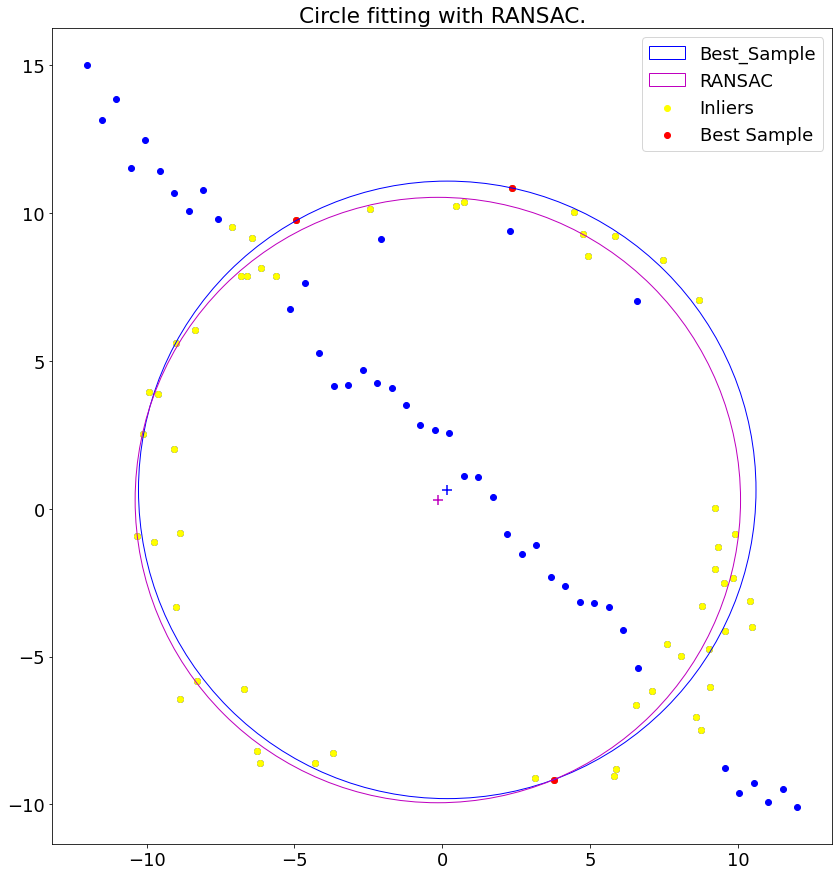

56


In [19]:
_x=[]
_y=[]

for i in X:
    _x.append(i[0])
    _y.append(i[1])

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

class RANSAC:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_max=15
        self.best_model = None
        self.point= None
        self.mod = None
        self.inliers = None

    
    def selecting_random_points(self): # random selection of points
        
        count_ = 0
        ran = []
        smpl = []
        

        
        while True:
            r = np.random.randint(len(self.x_data))
            if r not in ran:
                smpl.append((self.x_data[r], self.y_data[r]))
                ran.append(r)
                count_ += 1

                if count_ == 3:# when three different points are selected return the array
                    break

        return smpl
    

    def modelling(self, smpl): # generating a model considering the three points selected

        pt1 = smpl[0]
        pt2 = smpl[1]
        pt3 = smpl[2]
       
        M1 = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
        M2 = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])	

        M1_inv = inv(M1)

        cx, cy = np.dot(M1_inv, M2) / 2

        cx, cy = cx[0], cy[0]

        radius = np.sqrt((cx - pt1[0])**2 + (cy - pt1[1])**2)

        return cx, cy, radius

    
    def get_inliers(self,cx,cy,r): # getting the array of points inside the donut area

        inliers_=[]

        thresh=1.4

        x_d=self.x_data
        y_d=self.y_data

        for i in range(len(x_d)):
            dis = np.sqrt((x_d[i]-cx)**2 + (y_d[i]-cy)**2)
            if ( r-thresh <= abs(dis) <= r+thresh):

                inliers_.append([x_d[i],y_d[i]])
                
        
        return (inliers_) 

    def eval_model(self, model):
        
        c_x, c_y, rad = model
        
        inliers_ = self.get_inliers(c_x,c_y,rad)
        
        return inliers_

   
    def execute_ransac(self): # looking for the best modle for executing function
        
        
        for i in range(self.n):
            mod=self.selecting_random_points()
            model = self.modelling(mod)

            c_x, c_y, r = model

            d_temp = self.eval_model(model)
                
            if self.d_max < len(d_temp):
                self.best_model = model
                self.d_max = len(d_temp)
                self.mode = mod
                self.inliers = d_temp

if __name__ == '__main__':
    # make data
    xdata, ydata = _x,_y
    
    plt.scatter(xdata, ydata, c='blue')

    ransac = RANSAC(xdata, ydata, 100)
    
    ransac.execute_ransac()
    
    
    a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

    Point = ransac.inliers
    
    x_1=[]
    y_1=[]

    for i in Point:
        x_1.append(i[0])
        y_1.append(i[1])
    
    x_2=[]
    y_2=[]

    for i in ransac.mode:
        x_2.append(i[0])
        y_2.append(i[1])

    plt.rcParams['figure.figsize'] = (15, 15)
    plt.rcParams.update({'font.size': 18})

    plt.scatter(x_1,y_1,color = 'yellow',label='Inliers')
    plt.scatter(x_2,y_2,color = 'red',label='Best Sample')
    plt.scatter(a,b,s = 100,c = 'b',marker = '+')
    
    circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False,label = 'Best_Sample')
    
    plt.gca().add_patch(circle)
    
    
    
    ransac = RANSAC(x_1, y_1, 100)
    ransac.execute_ransac()
    a2, b2, r2 = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    circle = plt.Circle((a2, b2), radius=r2, color='m', fc='y', fill=False,label = 'RANSAC')
    plt.scatter(a2,b2,s = 100,c = 'm',marker = '+')

    plt.gca().add_patch(circle)
    plt.axis('scaled')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,3,0,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.title('Circle fitting with RANSAC.')
    plt.show()
    print(len(Point))
    

Question 02:

Text(0.5, 1.0, 'Blended Image')

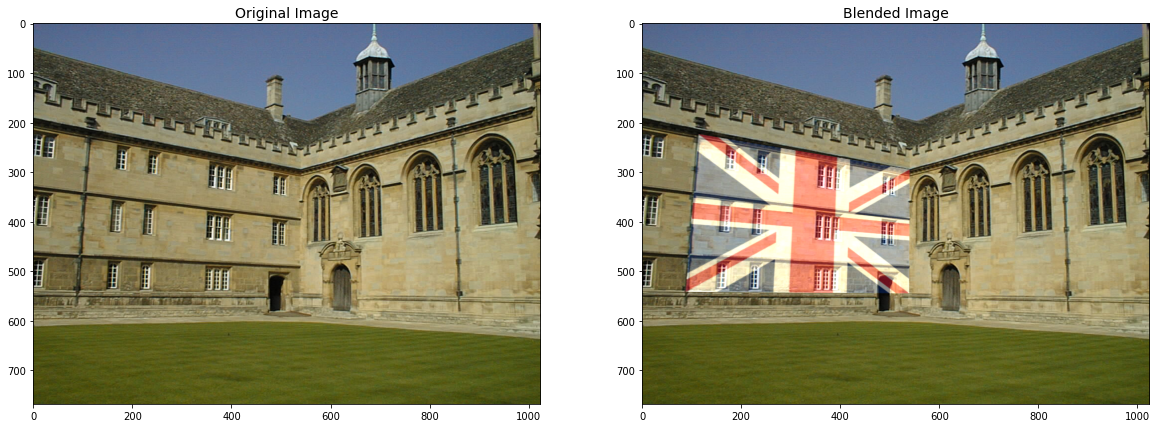

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

mouse_points = np.zeros((4,2))
count = 0

img1 =cv.imread(r'002.jpg') 
img2=cv.imread(r'Flag.png')

shape=np.shape(img2)
H,W=shape[0],shape[1]
source_points=np.array([[0,0],[W-1,0],[W-1,H-1],[0,H-1]])

def mousePoints(event,x,y,flags,params): # function to get the points of mouse click
    global count

    if event == cv.EVENT_LBUTTONDOWN:
        mouse_points[count] = x,y
        count = count + 1

while True:

    if count==4: # Only 4 points are considered
        cv.destroyAllWindows()
        break

    cv.imshow("original",img1)
    cv.setMouseCallback("original",mousePoints)
    cv.waitKey(0)

h,status=cv.findHomography(source_points,mouse_points)
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
_result = cv.addWeighted(img1,1,im_out,0.5,0)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontsize = 14)

ax[1].imshow(cv.cvtColor(_result, cv.COLOR_BGR2RGB))
ax[1].set_title('Blended Image',fontsize = 14)




Question 03:

(a)

[]

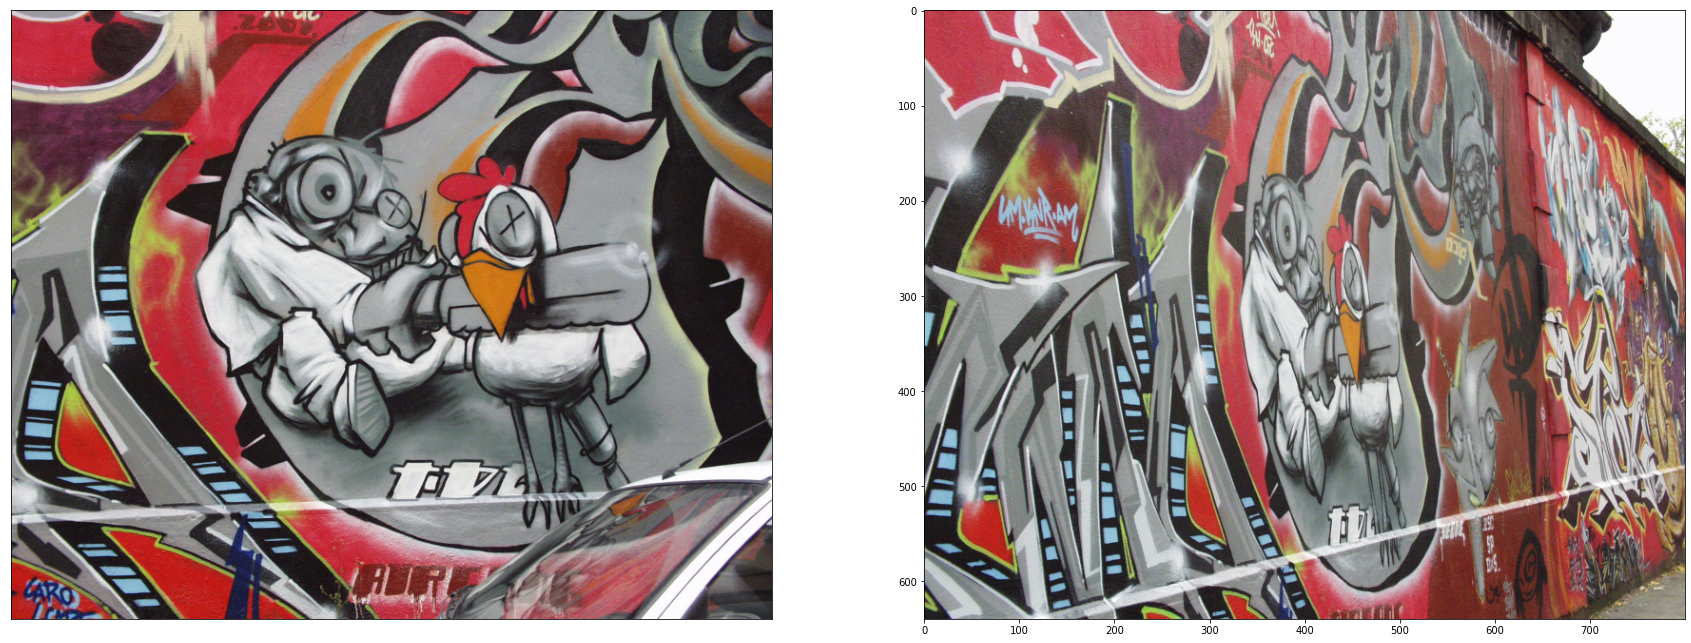

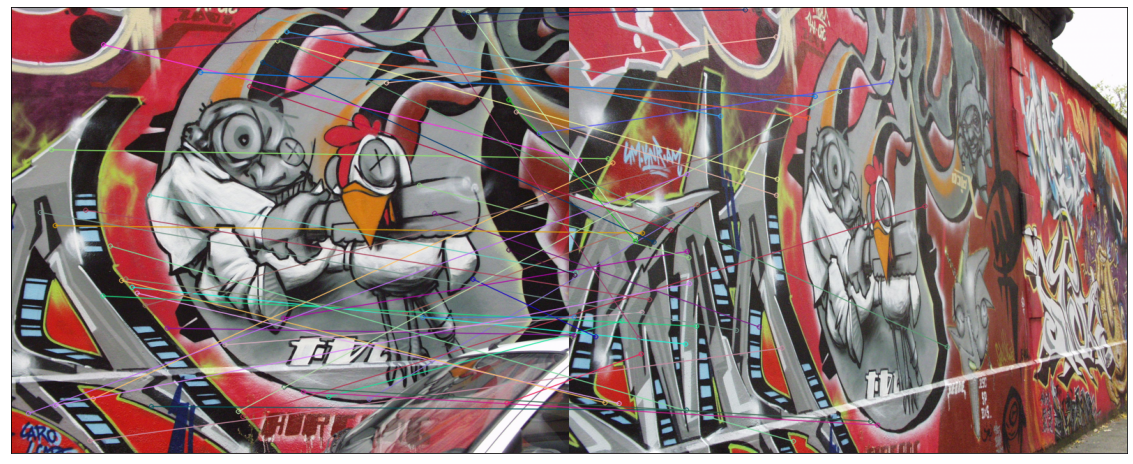

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('img1.ppm')
img5 = cv2.imread('img5.ppm')

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

len(keypoints_1), len(keypoints_2)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:50], img5, flags=2)

fig, ax = plt.subplots(1, 2, figsize=(30, 15))
ax[0].imshow(img1)
ax[1].imshow(img5)

ax[0].set_xticks([])
ax[0].set_yticks([])

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img3)
ax.set_xticks([])
ax.set_yticks([])

In [8]:
import scipy.linalg 

img1 = cv2.imread('img1.ppm')
img2 = cv2.imread('img5.ppm')

sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100000)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        good.append([m])
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
good=np.array(good)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
def get_homography(X, Y):
    O = np.array([[0],[0],[0]])
    A = []
    for i in range(4):
        A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
        A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))
    A = np.array(A).squeeze().astype(np.float64)
    eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
    H = eigen_vectors[:, np.argmin(eigen_values)]
    H = H.reshape(3, -1)
    return H
def get_inlier_count(X_full, Y_full, H, t):
    count = 0
    t_X_full = H @ X_full
    t_X_full = t_X_full / t_X_full[2,:]
    error = np.sqrt(np.sum(np.square(t_X_full - Y_full), axis=0))
    count = np.where(error <= t)[0].shape[0]
    return count
def random_points(X,n):
    sample=[]
    for r in range(0,n):
        random_index=np.random.randint(len(X))
        while True:
            if random_index not in sample:
                sample.append(random_index)
                break
            else:
                random_index=np.random.randint(len(X))

    return sample
def RANSAC(pts1,pts2, matches, t, s, N):
    best_fit_homography = None
    best_inlier_count = 0
    count_db = []
    X_full =np.concatenate((pts1,np.ones((len(pts1),1))),axis=1).T
    Y_full =np.concatenate((pts2,np.ones((len(pts2),1))),axis=1).T
    for r in range(N):
        x = random_points(matches,s)
        X = np.zeros((4,3))
        Y = np.zeros((4,3))
        for i, idx in enumerate(x):
            X[i,:] = np.array([pts1[idx][0], pts1[idx][1], 1])
            Y[i,:] = np.array([pts2[idx][0], pts2[idx][1], 1])
        X = X.T
        Y = Y.T
        H = get_homography(X,Y)
        count = get_inlier_count(X_full, Y_full, H, t)
        count_db.append(count)
        if count > best_inlier_count:
            best_fit_homography = H
            best_inlier_count = count
    return best_fit_homography, best_inlier_count, count_db
actual_H=np.array([[6.6378505e-01,6.8003334e-01,-3.1230335e+01],[1.4495500e-01,9.7128304e-01,1.4877420e+02],[4.2518504e-04,-1.3930359e-05,1.0000000e+00]])
d = len(good) * 0.8
H, count, count_db = RANSAC(pts1,pts2,good, 1, 4, 10000)
error = np.sum(np.square(actual_H - H/H[2][2]))
print(error)
print(H/H[2][2])
final_img = cv.warpPerspective(img2,linalg.inv(H/H[2][2]),dsize=(1100,1100))
t_img_5 = np.copy(final_img)
final_img[0:img1.shape[0], 0:img1.shape[1]] = img1
fig, ax = plt.subplots(1, 4, figsize=(30, 5))

196146.8424692257
[[ 5.60633381e+00 -2.95481896e+00  2.51557960e+02]
 [ 9.31262419e+00 -5.16120084e+00  4.89388832e+02]
 [ 2.87368249e-02 -1.46167073e-02  1.00000000e+00]]


NameError: name 'linalg' is not defined